# GRIPFEB21

# Devoloped by : Venkatesh Surampally

# Task 2

# Prediction Using Unsupervised Learning

# From the given ‘Iris’ dataset, predict the optimum number of clusters

In [17]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

Exploring the data

In [6]:
#read dataset
df = pd.read_csv('Iris.csv')

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.describe().transform

<bound method DataFrame.transform of                Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000>

Feeding the data into X

In [14]:
X = df.iloc[:,1:-1].values

Using Elbow method find optimal number of clusters

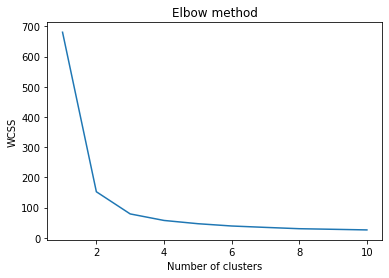

In [20]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

It can be seen that after n_clusters = 3 WCSS isn't decreasing much so we can say that there are 3 possible clusters.

Let's also try dendrogram.

In [21]:
import scipy.cluster.hierarchy as sch

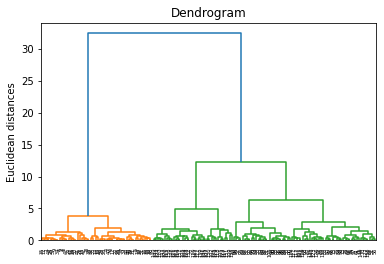

In [24]:
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

Training the K-Means model on the dataset.

In [27]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_pred=kmeans.fit_predict(X)

Visualisation

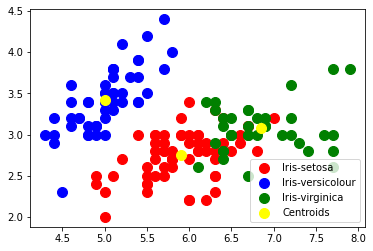

In [30]:
# Visualising the clusters on sepal length and sepal width
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

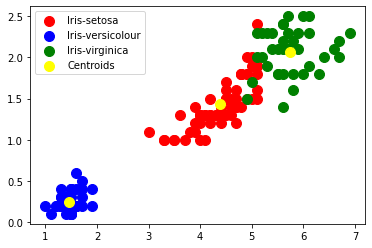

In [32]:
# Visualising the clusters on sepal length and sepal width
plt.scatter(X[y_pred == 0, 2], X[y_pred == 0, 3], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_pred == 1, 2], X[y_pred == 1, 3], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_pred == 2, 2], X[y_pred == 2, 3],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()